# Exploring the Math Behind Crash | Roobet Cryptocurrency Casino Game

Exploring the math, statistics, and code of the Roobet Crash cryptocurrency casino game in order to calculate the expected value and average loss per game. Using Python, we are able to simulate different betting strategies and determine the effectiveness of these approaches.



## Necessary Libraries and Constants

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hashlib
import random
import string
import hmac

e = 2**52
salt = "0000000000000000000fa3b65e43e4240d71762a5bf397d5304b2596d116859c"

## Get Result and Get Previous Game Function

$$int \left( \dfrac{100\cdot e - h}{e-h} \right) \cdot \dfrac{1}{100}$$

In [2]:
def get_result(game_hash):
    hm = hmac.new(str.encode(game_hash), b'', hashlib.sha256)
    hm.update(salt.encode("utf-8"))
    h = hm.hexdigest()
    if (int(h, 16) % 33 == 0):
        return 1
    h = int(h[:13], 16)
    e = 2**52
    return (((100 * e - h) / (e-h)) // 1) / 100.0

def get_prev_game(hash_code):
    m = hashlib.sha256()
    m.update(hash_code.encode("utf-8"))
    return m.hexdigest()

## Collecting All Game Results

In [3]:
game_hash = '100af1b49f5e9f87efc81f838bf9b1f5e38293e5b4cf6d0b366c004e0a8d9987' # Update to latest game's hash for more results
first_game = "77b271fe12fca03c618f63dfb79d4105726ba9d4a25bb3f1964e435ccf9cb209"

results = []
count = 0
while game_hash != first_game:
    count += 1
    results.append(get_result(game_hash))
    game_hash = get_prev_game(game_hash)
    
results = np.array(results)

In [4]:
len(results)

618990

We could use more result. but i don't think that necessory

In [15]:
game_hash = 'hash of the last game'

results = []
count = 0
for x in range(10**6):
    count += 1
    results.append(get_result(game_hash))
    game_hash = get_prev_game(game_hash)
    
results = np.array(results)

In [16]:
len(results)

1000000

## Testing Probability Formula

Probability of lossing of using the data and using the formula

Let $U$ ~ $Uniform(0,e)$ Where $e = 2^{52}$

$Multiplier = \dfrac{100e-U}{e-U} \cdot \dfrac{1}{100}$

$Multiplier = \dfrac{99e +  (e-U)}{e-U} \cdot \dfrac{1}{100}$

$\approx \dfrac{99e}{100U} + 0.01$

$\approx 0.01 + \dfrac{0.99}{Uniform(0,1)}$

$\dfrac{0.99}{Uniform(0,1)}$

So, $P(X\leq x) \approx 1 - \dfrac{1}{x}$

According to the code:

$$P(X\leq x) = \dfrac{1}{33} + \dfrac{32}{33}(0.01+0.99(1-\dfrac{1}{x}))$$

## Probability of lossing 

In [17]:
multiplier = 2
1/20 + (19/20)*(.01 + .99*(1 - 1/multiplier))

0.5297499999999999

In [18]:
(results <= multiplier).mean()

0.519544

## Testing Expected Value Formula

In [19]:
multiplier = 2
((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01))))*-1 + (multiplier-1)*(1 - ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01)))))

-0.03517587939698519

In [20]:
(results < multiplier).mean() * -1 + (multiplier - 1)*(results >= multiplier).mean()

-0.03421000000000002

## Visualizations

Text(0.5, 0, 'Multiplier')

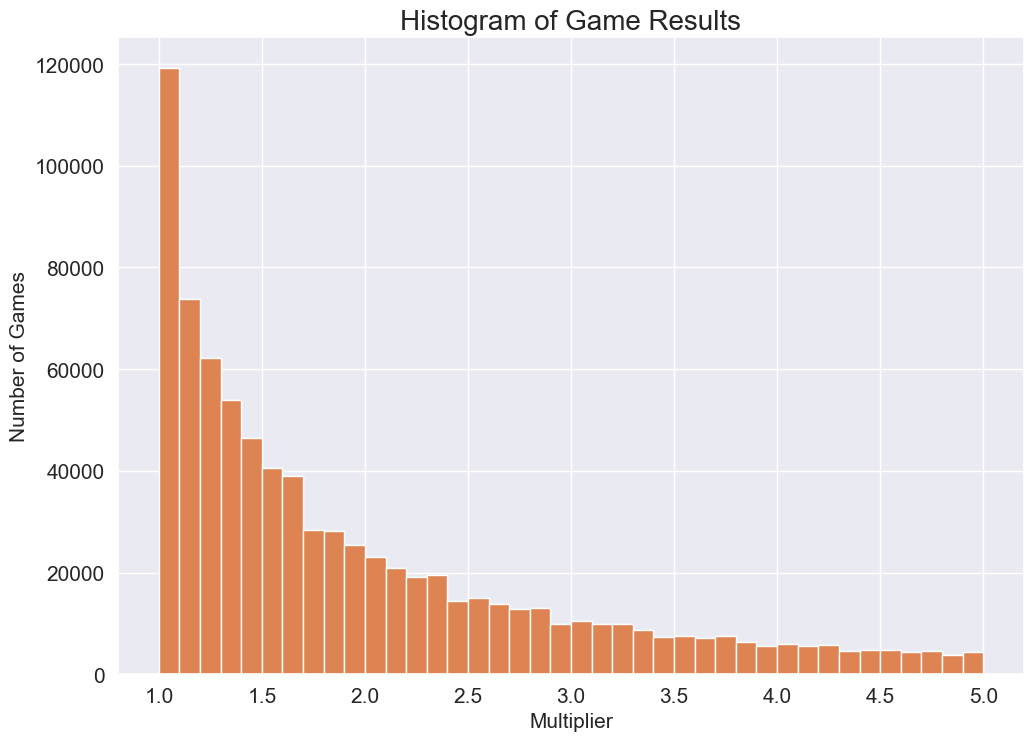

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(results, bins=40, range=(1,5))
plt.hist(results, bins=40, range=(1,5))
plt.title("Histogram of Game Results", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Games", fontsize=15)
plt.xlabel("Multiplier", fontsize=15)

Text(0.5, 0, 'Multiplier')

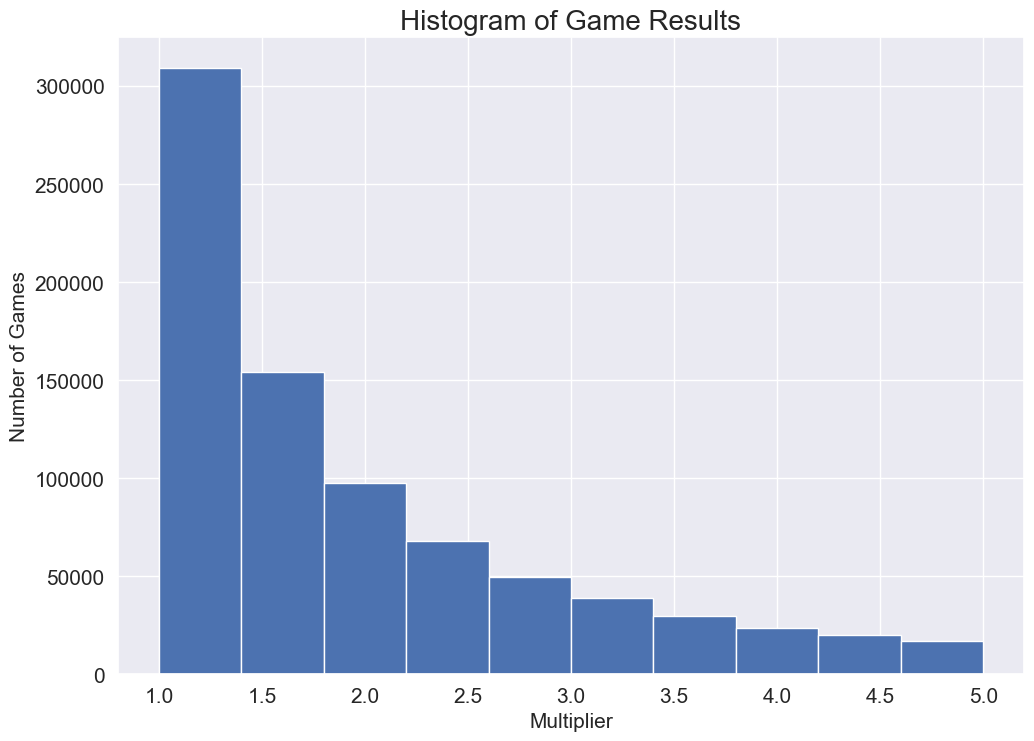

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(results, range=(1, 5))
plt.title("Histogram of Game Results", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Games", fontsize=15)
plt.xlabel("Multiplier", fontsize=15)

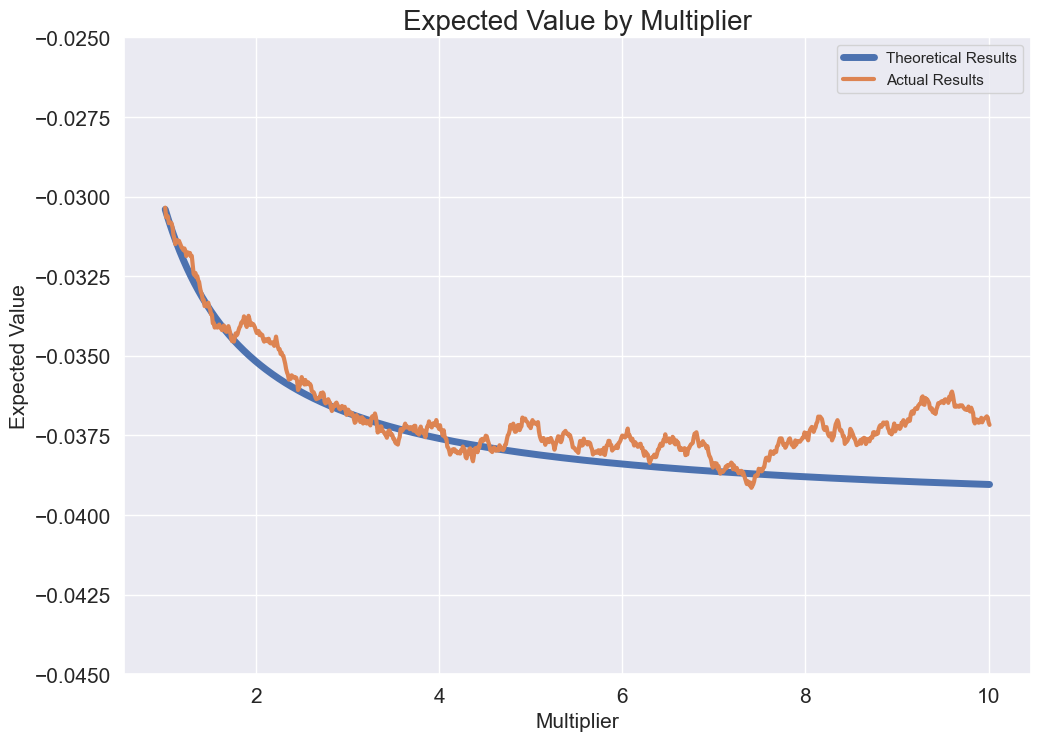

In [23]:
def calculate_ev(multiplier):
    return ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01))))*-1 + (multiplier-1)*(1 - ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01)))))

xs = np.linspace(101, 1001, 901) / 100
ys = [calculate_ev(x) for x in xs]
y2s = [(results < x).mean() * -1 + (x - 1)*(results >= x).mean() for x in xs]

plt.plot(xs, ys, linewidth=5)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Expected Value", fontsize=15)
plt.ylabel("Expected Value", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.045, -.025)

plt.plot(xs, y2s, linewidth=3)

plt.title("Expected Value by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Actual Results"])
plt.show()

# Martingale Strategy

In [24]:
negatives = []
in_a_row = 0
for multiplier in results:
    if multiplier < 2:
        in_a_row += 1
    else:
        in_a_row = 0
    negatives.append(in_a_row)
negatives = np.array(negatives)

In [25]:
for x in range(13):
    print(0.5174943**x)

1.0
0.5174943
0.26780035053248996
0.13858515493856552
0.0717170277453245
0.03711315307114728
0.01920584516934621
0.009938915401819197
0.005143332068623644
0.002661645028519944
0.0013773861308824084
0.0007127894716307003
0.00036886448866889907


In [26]:
for i in range(1, 14):
    print("Probability of Losing %d Game(s) in a Row:"%i, (negatives >= i).mean())

Probability of Losing 1 Game(s) in a Row: 0.517105
Probability of Losing 2 Game(s) in a Row: 0.267967
Probability of Losing 3 Game(s) in a Row: 0.13873
Probability of Losing 4 Game(s) in a Row: 0.071758
Probability of Losing 5 Game(s) in a Row: 0.03705
Probability of Losing 6 Game(s) in a Row: 0.019131
Probability of Losing 7 Game(s) in a Row: 0.009888
Probability of Losing 8 Game(s) in a Row: 0.005104
Probability of Losing 9 Game(s) in a Row: 0.002611
Probability of Losing 10 Game(s) in a Row: 0.001362
Probability of Losing 11 Game(s) in a Row: 0.000698
Probability of Losing 12 Game(s) in a Row: 0.000353
Probability of Losing 13 Game(s) in a Row: 0.00019


## Martingale Strategy -  Our Version

In [27]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1]+begin_value)*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))
    
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
        
        
    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))
    
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")
    for i in range(1, len(bid_list)+1):
        print("Probability of Losing %d Game(s) in a Row:\t"%i, round((negatives >= i).mean(),6),"\t",  round((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**i, 6) )

In [28]:
x = 1.14545454545454
print("Our Guess :\t\t\t\t\t ", x)
bid(begin_value=100, multiplier=x, end_value=100000)
print("\n" ,"-"*100,"\n")

Our Guess :					  1.14545454545454
Total Spend : 					 [100, 1475, 12303, 97574]
Bid of Each Turn : 				 [100, 1375, 10828, 85271]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.157733 	 0.161905
Probability of Losing 2 Game(s) in a Row:	 0.02493 	 0.026213
Probability of Losing 3 Game(s) in a Row:	 0.003915 	 0.004244
Probability of Losing 4 Game(s) in a Row:	 0.000608 	 0.000687

 ---------------------------------------------------------------------------------------------------- 



In [29]:
for x in np.arange(1.1,2.1,0.1):
    print("Our Guess :\t\t\t\t\t ", round(x,5))
    bid(begin_value=100, multiplier=x, end_value=100000)
    print("\n" ,"-"*100,"\n")

Our Guess :					  1.1
Total Spend : 					 [100, 2100, 24100]
Bid of Each Turn : 				 [100, 2000, 22000]

No of turns you can play before runout of money:  3
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.11927 	 0.127273
Probability of Losing 2 Game(s) in a Row:	 0.014281 	 0.016198
Probability of Losing 3 Game(s) in a Row:	 0.001724 	 0.002062

 ---------------------------------------------------------------------------------------------------- 

Our Guess :					  1.2
Total Spend : 					 [100, 1100, 7100, 43100]
Bid of Each Turn : 				 [100, 1000, 6000, 36000]

No of turns you can play before runout of money:  4
						 From Data 	 From Formula
						-------------------------
Probability of Losing 1 Game(s) in a Row:	 0.199739 	 0.2
Probability of Losing 2 Game(s) in a Row:	 0.039925 	 0.04
Probability of Losing 3 Game(s) in a Row:	 0.007952 	 0.008
Probability of Losing 4 Game(s) in a Row:	 0.00157 	 0.0016

 --------------

---

In [30]:
# Probability of Losing All the money
p_theorical = []
p_practical = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]
    
    # While Playing
    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1]+begin_value)*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))
    
    # We can't exeed the end value
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
    
#     Calculate the Practical value
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)

    p_practical.append((negatives >= len(bid_list)).mean())
    
    p_theorical.append((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**len(bid_list))

In [31]:
len(np.linspace(1.1,2.0,100))

100

In [32]:
from tqdm import tqdm 

xs = np.linspace(1.1,2.0,100)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000) 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.89it/s]


In [33]:
len(p_practical) , len(p_theorical)

(100, 100)

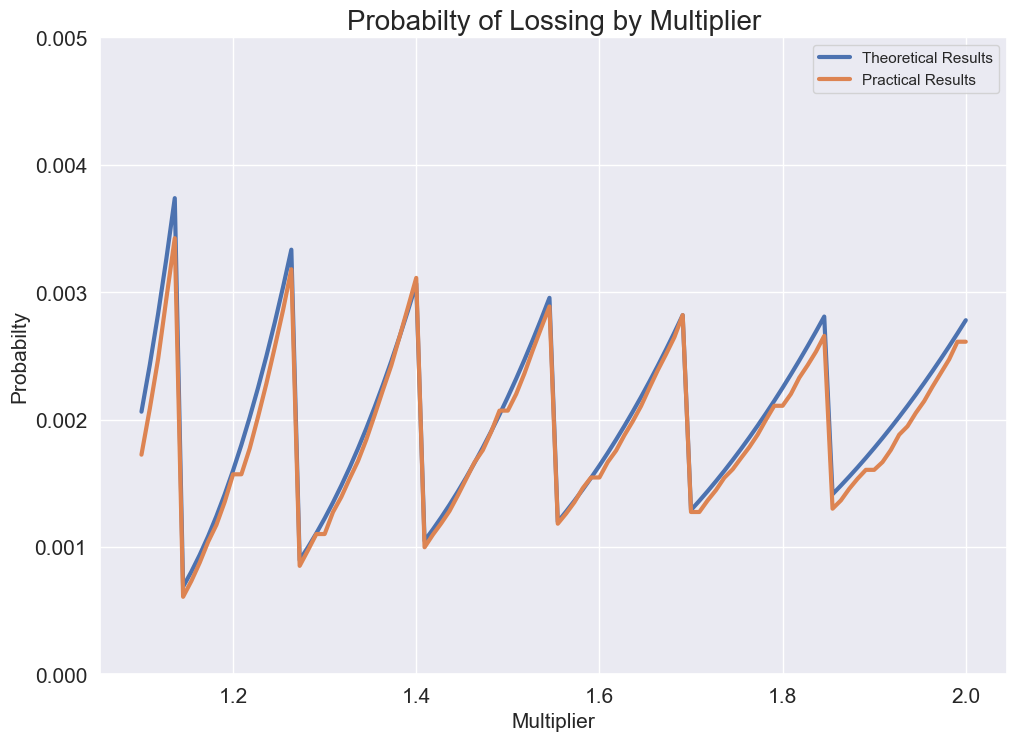

In [34]:
plt.plot(xs, p_theorical, linewidth=3)
plt.plot(xs, p_practical, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

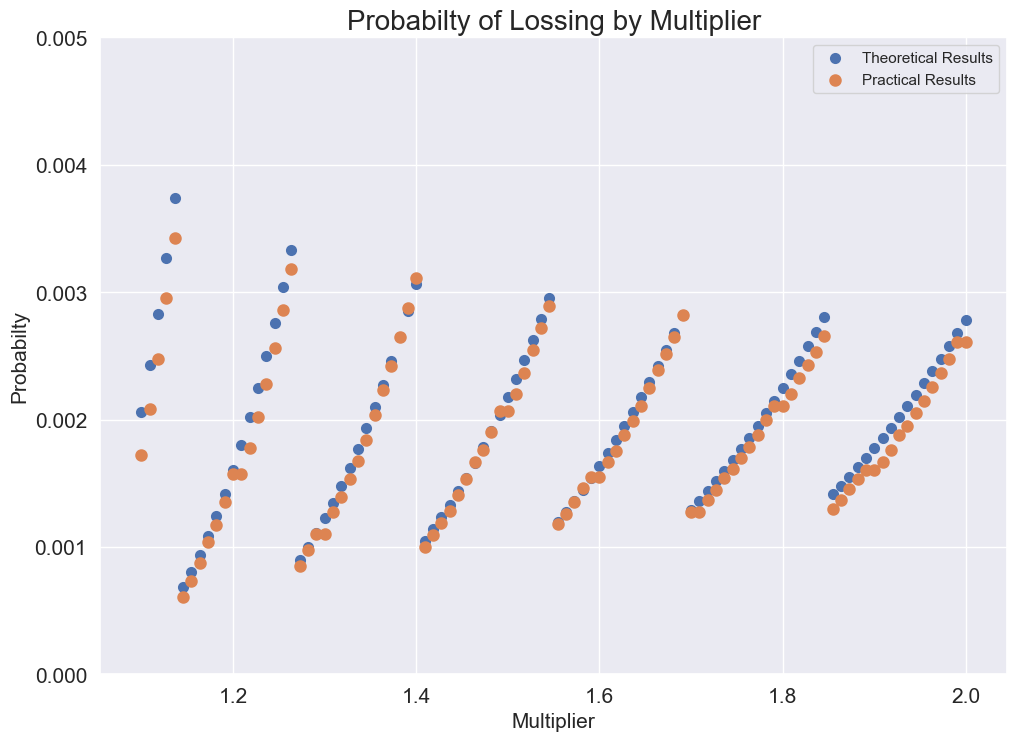

In [35]:
plt.scatter(xs, p_theorical, linewidth=2)
plt.scatter(xs, p_practical, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

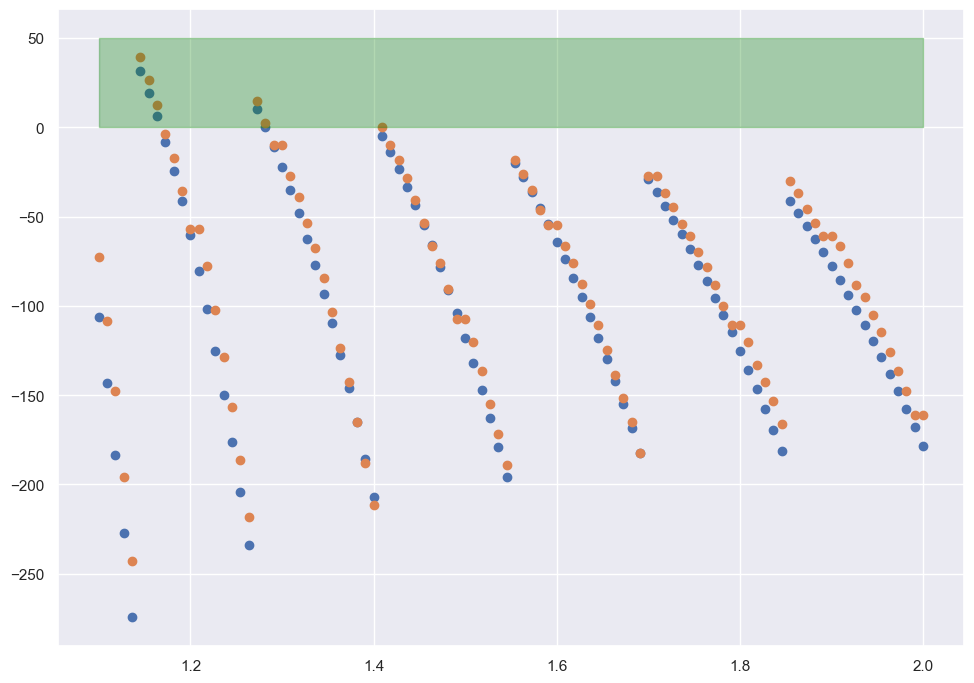

In [39]:
new1 = []
for i in range(len(p_theorical)):
    new1.append((1-p_theorical[i])*100-100000*p_theorical[i])
plt.scatter(xs, new1)

new2 = []
for i in range(len(p_practical)):
    new2.append((1-p_practical[i])*100-100000*p_practical[i])
plt.scatter(xs, new2)

plt.fill_between(xs, np.ones(len(new1))*50, alpha=0.3, color='green')
plt.show()

In [40]:
p_theorical[new2.index(max(new2))] , min(p_theorical)

(0.0006871293339709279, 0.0006871293339709279)

In [41]:
best = min(p_theorical)
best

0.0006871293339709279

In [42]:
xs[p_theorical.index(min(p_theorical))]

1.1454545454545455

In [43]:
(1-best)/best

1454.330096622406

In [44]:
(1-0.00278)*100-100000*0.00278

-178.27800000000002

In [45]:
(1-best)*100-100000*best

31.21835366951011

If you Play until end of the World You will have profit of Rs.31

In [46]:
# Probability of Losing All the money
p_theorical2 = []
p_practical2 = []


def bid(begin_value=100, multiplier=1.2, end_value=100000):
    # At Begining
    spend_list = [begin_value]
    bid_list = [begin_value]
    
    # While Playing
    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1]+begin_value)*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))
    
    # We can't exeed the end value
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
    
#     Calculate the Practical value
#     negatives = []
#     in_a_row = 0
#     for result in results:
#         if result < multiplier:
#             in_a_row += 1
#         else:
#             in_a_row = 0
#         negatives.append(in_a_row)
#     negatives = np.array(negatives)

#     p_practical2.append((negatives >= len(bid_list)).mean())
    
    p_theorical2.append((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**len(bid_list))

from tqdm import tqdm 

xs = np.linspace(1.1,10.0,10000)
for x in tqdm(xs):
    bid(begin_value=100, multiplier=x, end_value=100000) 

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12361.87it/s]


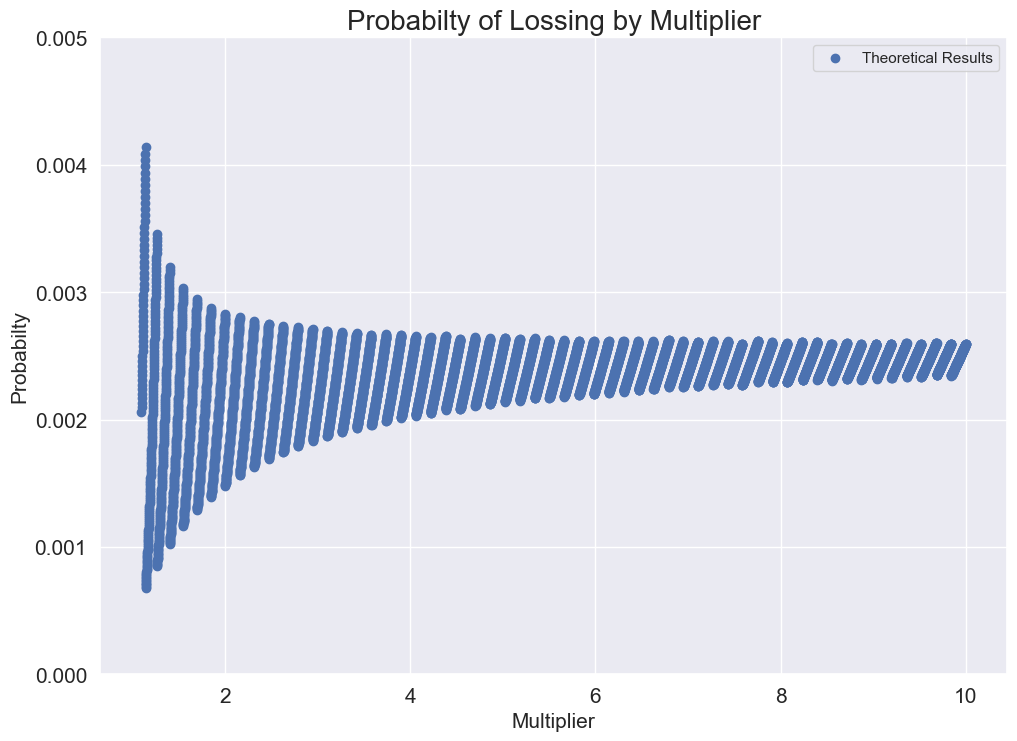

In [60]:
# plt.plot(xs, p_theorical2, linewidth=1)
plt.scatter(xs, p_theorical2)
# plt.plot(xs, p_practical2, linewidth=3)

plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Probabilty", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 0.005)

plt.title("Probabilty of Lossing by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Practical Results"])
plt.show()

In [61]:
len(p_theorical2)

10000

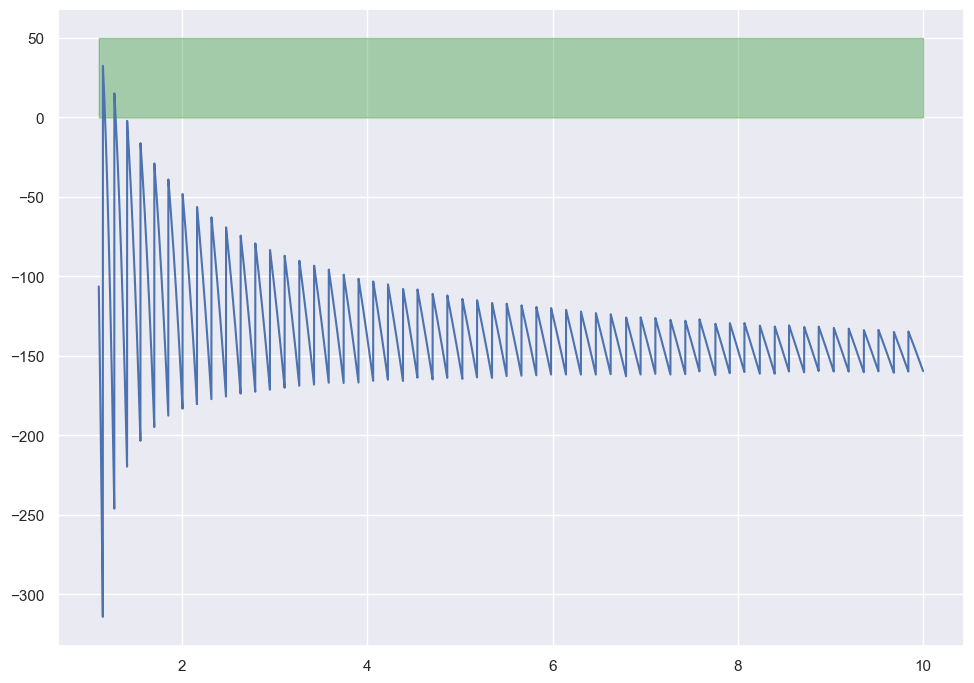

In [62]:
new = []
for i in range(len(p_theorical2)):
    new.append((1-p_theorical2[i])*100-100000*p_theorical2[i])
    
plt.plot(xs, new)
plt.fill_between(xs, np.ones(len(new))*50, alpha=0.3, color='green')
plt.show()

Martingale Strategy - Our Version

In [63]:
def bid(begin_value=100, multiplier=1.2, end_value=100000):
    spend_list = [begin_value]
    bid_list = [begin_value]

    while spend_list[-1]<=end_value:
        bid_list.append(round((spend_list[-1]+begin_value)*(1/(multiplier-1))))
        spend_list.append(sum(bid_list))
    
    if spend_list[-1]>=end_value:
        spend_list.pop()
        bid_list.pop()
        
        
    print("Total Spend : \t\t\t\t\t", spend_list)
    print("Bid of Each Turn : \t\t\t\t", bid_list)
    print()
    print("No of turns you can play before runout of money: ", len(bid_list))
    
    negatives = []
    in_a_row = 0
    for result in results:
        if result < multiplier:
            in_a_row += 1
        else:
            in_a_row = 0
        negatives.append(in_a_row)
    negatives = np.array(negatives)
    print("\t\t\t\t\t\t From Data \t From Formula")
    print("\t\t\t\t\t\t-------------------------")
    for i in range(1, len(bid_list)+1):
        print("Probability of Losing %d Game(s) in a Row:\t"%i, round((negatives >= i).mean(),6),"\t",  round((1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier)))**i, 6) )